In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Датасет

In [2]:
data = pd.read_csv("yours11.csv", delimiter=";")

### Анализ датасета

In [3]:
data.shape

(634, 9)

In [4]:
data.head()

X  Y   Z        Q1         Q2         Q3        Q4         Q5  Q6
0  1200  0   0  0.095005  18.390132 -10.654713  0.008261   5.977605   0
1  1200  0  10 -0.111820  18.577837 -12.302255  0.064164  15.555984   0
2  1190  0  10 -0.117037  18.035069 -14.077886  0.172542  27.840695   0
3  1200  0  20  0.075283  16.329078 -19.210203  0.302919  42.283934   0
4  1190  0  20 -0.149259  14.107479 -23.256663  0.485059  59.449475   0

In [5]:
data.describe()

X      Y           Z          Q1          Q2          Q3  \
count   634.000000  634.0  634.000000  634.000000  634.000000  634.000000   
mean   1087.287066    0.0  227.444795   -0.117253   20.254980  -14.978333   
std      83.769164    0.0   83.971903    0.094769   10.546813   16.263529   
min     860.000000    0.0    0.000000   -0.236378   -5.210139  -51.921226   
25%    1030.000000    0.0  170.000000   -0.208908   13.017428  -27.972591   
50%    1100.000000    0.0  240.000000   -0.185569   20.489933  -15.645922   
75%    1160.000000    0.0  300.000000   -0.022291   28.145911   -2.580433   
max    1200.000000    0.0  350.000000    0.095005   43.057755   21.754125   

               Q4          Q5     Q6  
count  634.000000  634.000000  634.0  
mean     2.525426  154.545631    0.0  
std      0.544238   12.562640    0.0  
min      0.008261    5.977605    0.0  
25%      2.200298  153.318311    0.0  
50%      2.396085  156.457649    0.0  
75%      2.837689  158.420064    0.0  
max      3.754301  163.067838    0.0

In [6]:
feature_columns = ["X", "Y", "Z"]
target_columns = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]
idx_subset = np.random.choice(data.shape[0], replace=True, size=10000)
data_subset = data.loc[idx_subset]

In [9]:
pca = PCA(n_components=3)


pca_result = pca.fit_transform(data_subset[feature_columns].values)

print("Explained variation per principal component: {}".format(pca.explained_variance_ratio_))

Explained variation per principal component: [7.05789972e-01 2.94210028e-01 9.01513016e-34]


In [32]:
data_subset["pca1"] = pca_result[:,0]
data_subset["pca2"] = pca_result[:,1] 
data_subset["pca3"] = pca_result[:,2]

fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2)

for q, ax in zip(target_columns, axes.flat):
    sns.scatterplot(
        x="pca1", y="pca2",
        hue=q,
        data=data_subset,
        palette=sns.color_palette("coolwarm", as_cmap=True), 
        alpha=0.3,
        ax=ax
    )

fig.tight_layout()

TypeError: 'LinearSegmentedColormap' object is not iterable

In [42]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2,
                         subplot_kw=dict(projection="3d"))

for q, ax in zip(target_columns, axes.flat):
    ax.scatter(
        xs=data_subset["pca1"], 
        ys=data_subset["pca2"], 
        zs=data_subset["pca3"], 
        c=data_subset[q],
    )

fig.tight_layout()

In [43]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=300, learning_rate="auto", init="random")
tsne_results = tsne.fit_transform(data_subset)

In [44]:
data_subset["tsne1"] = tsne_results[:, 0]
data_subset["tsne2"] = tsne_results[:, 1]

fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2)

for q, ax in zip(target_columns, axes.flat):
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue=q,
        data=data_subset,
        palette=sns.color_palette("coolwarm", as_cmap=True), 
        alpha=0.3,
        ax=ax
    )

fig.tight_layout()

TypeError: 'LinearSegmentedColormap' object is not iterable

[246 577 181 ... 353  46  63]
        X  Y    Z        Q1         Q2         Q3        Q4          Q5  Q6
246  1050  0  210 -0.213900  22.043339  -7.174003  2.493119  154.955208   0
577  1040  0  330 -0.202198  31.797010  -2.767933  2.147944  153.807668   0
181  1100  0  180 -0.027845  16.323796 -16.833605  2.833324  157.310079   0
28   1200  0   70 -0.205276  -2.876455 -47.843560  3.452313  162.733564   0
400   980  0  270 -0.042018  30.908321   4.991554  2.110950  151.460170   0
..    ... ..  ...       ...        ...        ...       ...         ...  ..
384  1140  0  270 -0.001137  19.981833 -21.290683  2.405370  157.932135   0
27   1140  0   60 -0.020501   2.972503 -32.129637  3.272806  160.630093   0
353  1180  0  260 -0.197592  15.606161 -30.342305  2.442112  158.019285   0
46   1190  0   90 -0.019613   0.469405 -42.604086  3.754301  162.035713   0
63   1120  0  100 -0.042365   8.211793 -24.928681  3.555425  159.129631   0

[10000 rows x 9 columns]


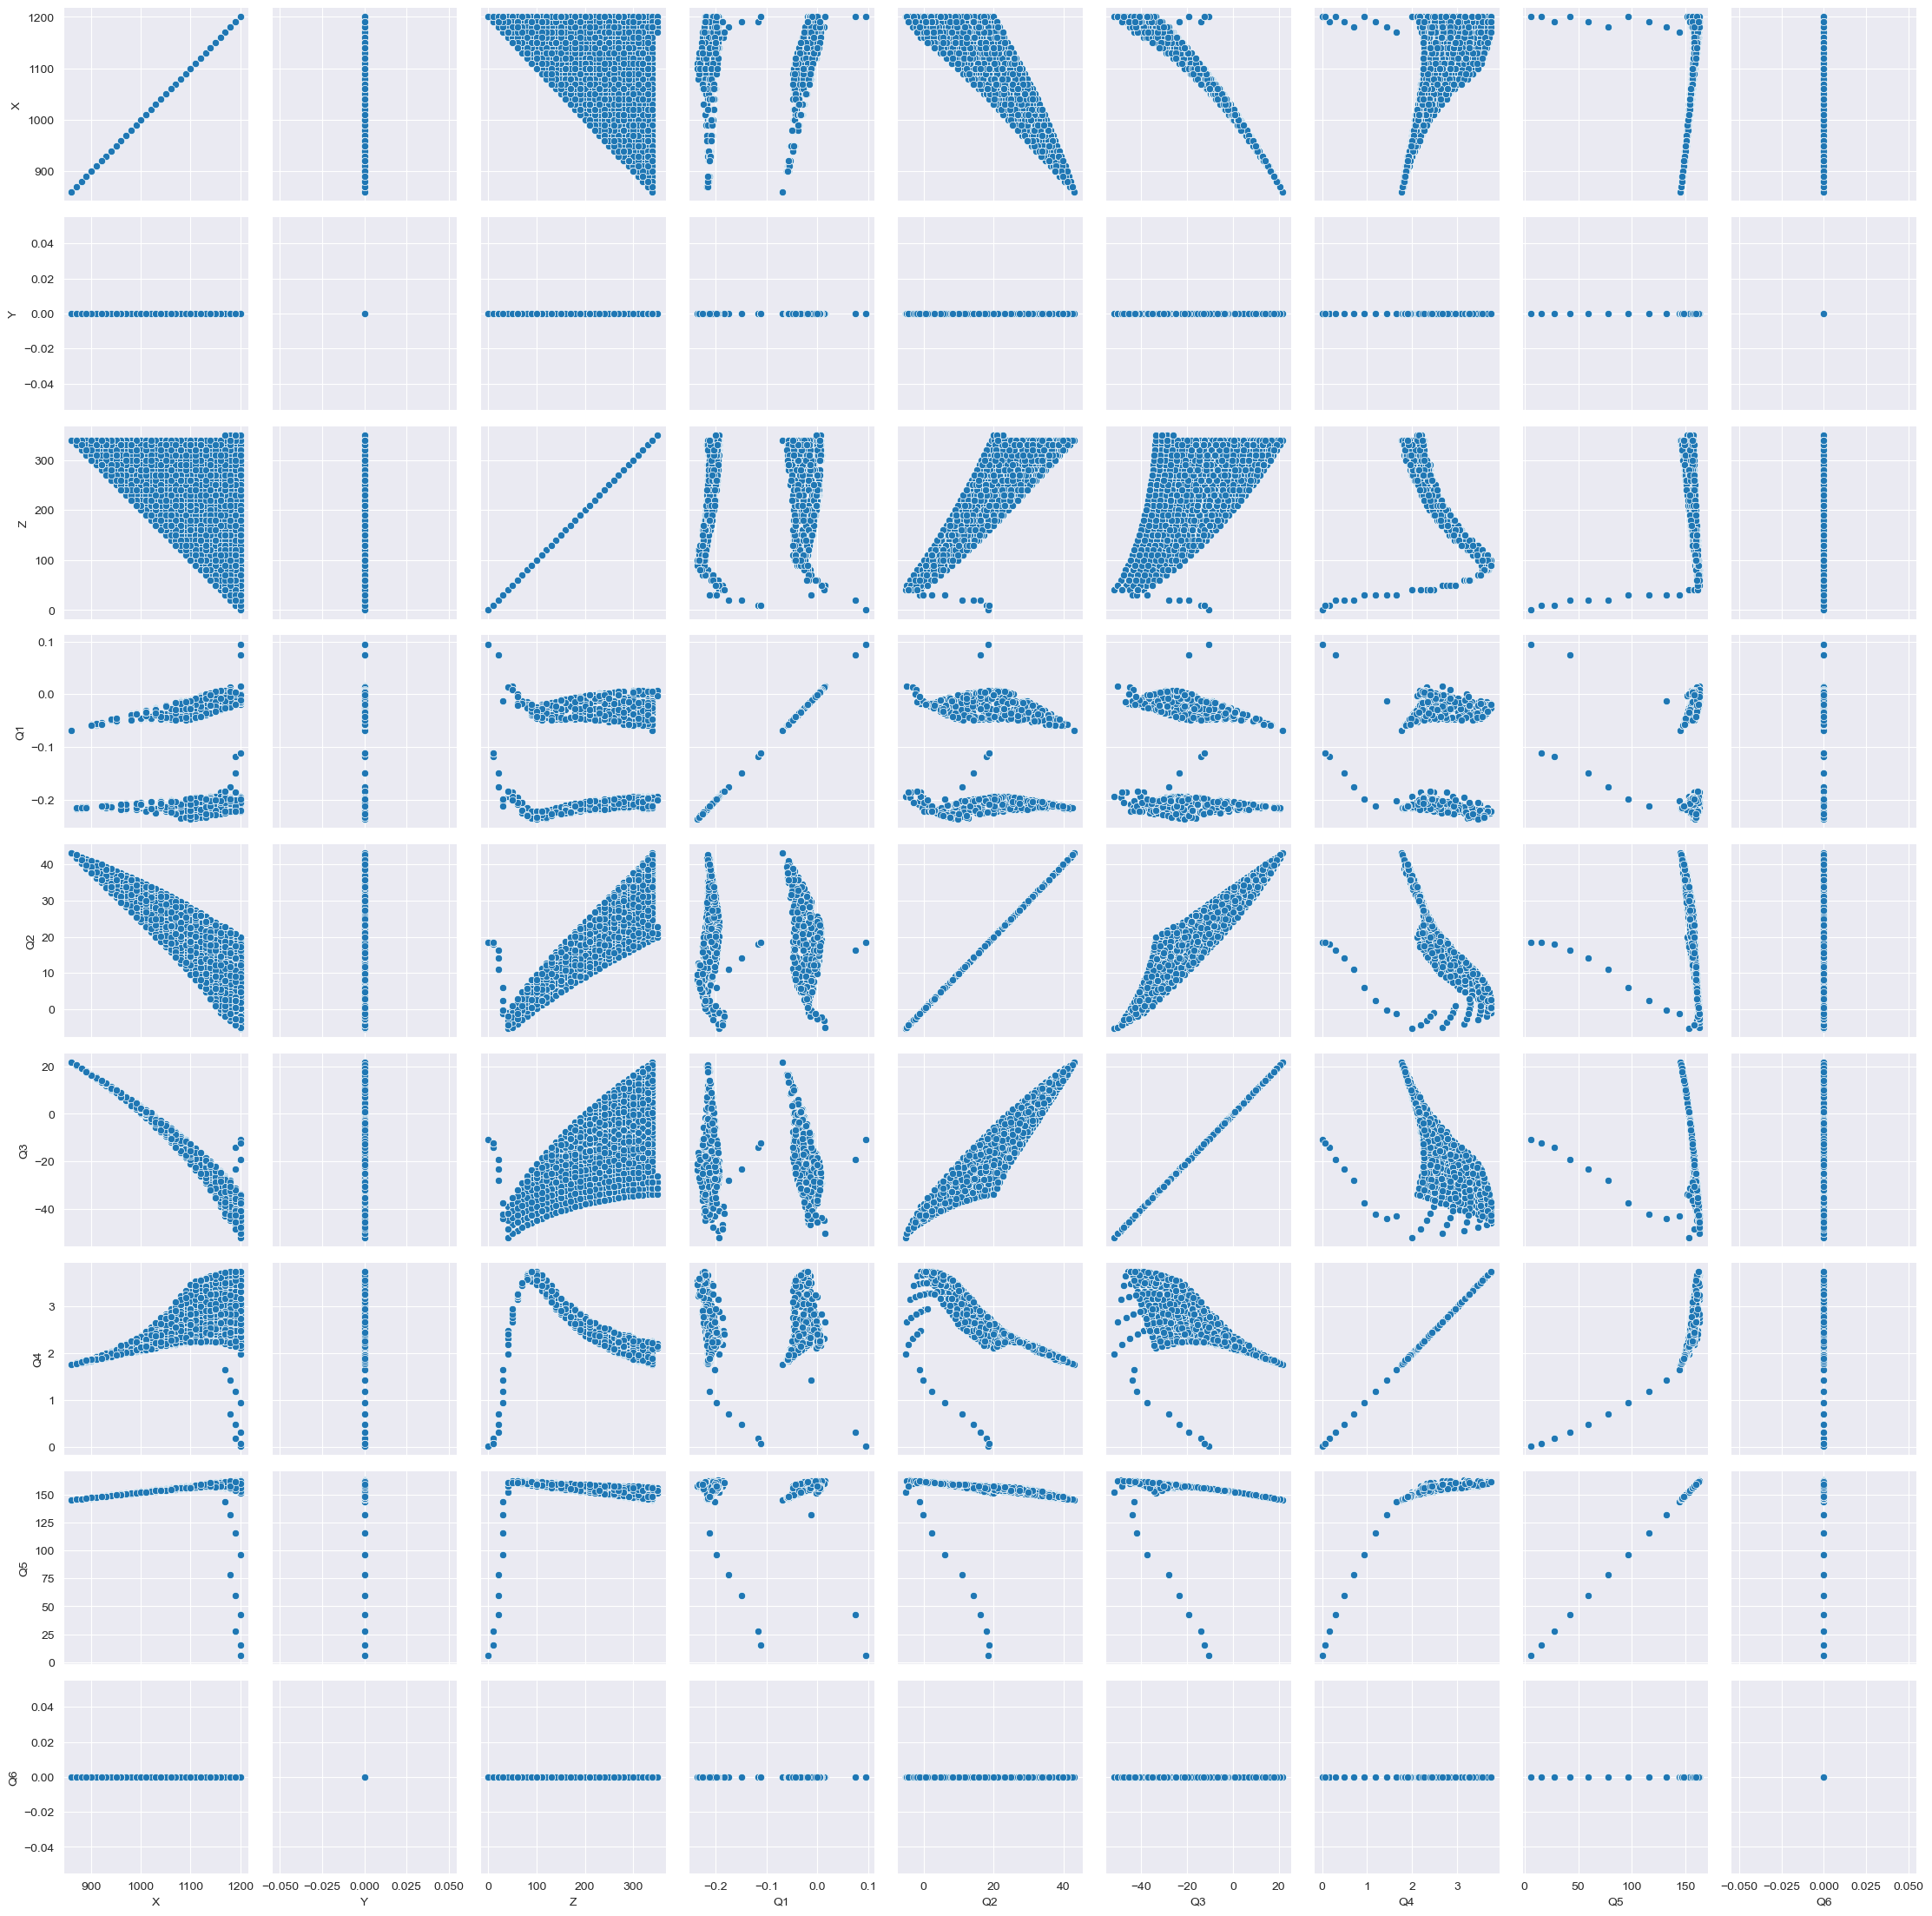

In [7]:
print(idx_subset)
data_subset_for_grid = data.loc[idx_subset]
print(data_subset_for_grid)
g = sns.PairGrid(data_subset_for_grid)
g.map(sns.scatterplot)
plt.show(sns)

In [47]:
g = sns.PairGrid(data_subset_for_grid)
g.map(sns.scatterplot)

### Препроцессинг

In [10]:
dups = data.duplicated(subset=feature_columns)

In [11]:
dups.shape

(66,)

In [12]:
data = data[~dups]

In [13]:
data.shape

(66, 9)

In [10]:
X = data.loc[:, feature_columns]
Y = data.loc[:, target_columns]

In [11]:
XX = X.values
print(XX)

[[1200    0    0]
 [1200    0   10]
 [1190    0   10]
 ...
 [1190    0  350]
 [1180    0  350]
 [1170    0  350]]


In [16]:
index_to_delete = []
for i in range(XX.shape[0]):

  for j in range(XX.shape[0]):
    if (i != j) and np.linalg.norm(XX[i]-XX[j]) < 2e-2:
      if j not in index_to_delete:
        index_to_delete.append(j)
len(index_to_delete)

0

In [12]:
import plotly.graph_objects as go
import numpy as np
XX = X.values
YY = Y.values
print(XX)
fig = go.Figure(data=[go.Scatter3d(x=XX[:,0], y=XX[:,1], z=XX[:,2],
                                   mode='markers',
                                      marker=dict(
                                        size=2,
                                        colorscale='Viridis',   # choose a colorscale
                                        opacity=0.8
                                    ))])
fig.show()

[[1200    0    0]
 [1200    0   10]
 [1190    0   10]
 ...
 [1190    0  350]
 [1180    0  350]
 [1170    0  350]]


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, shuffle=1, random_state=42)

In [15]:
X_train.shape, Y_train.shape

((538, 3), (538, 6))

In [16]:
X_test.shape, Y_test.shape

((96, 3), (96, 6))

In [17]:
X_train.head()

X  Y    Z
478  1070  0  300
165  1080  0  170
304  1160  0  240
227  1030  0  200
574  1070  0  330

In [22]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
X_train

X  Y    Z
478  1070  0  300
165  1080  0  170
304  1160  0  240
227  1030  0  200
574  1070  0  330
..    ... ..  ...
71   1150  0  110
106  1190  0  140
270  1030  0  220
435  1200  0  290
102  1090  0  130

[538 rows x 3 columns]

### Обучение сети

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, Callback

class ReturnBestEarlyStopping(EarlyStopping):
    def __init__(self, **kwargs):
        super(ReturnBestEarlyStopping, self).__init__(**kwargs)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            if self.verbose > 0:
                print(f'\nEpoch {self.stopped_epoch + 1}: early stopping')
        elif self.restore_best_weights:
            if self.verbose > 0:
                print('Restoring model weights from the end of the best epoch.')
            self.model.set_weights(self.best_weights)

In [33]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(6))
    #adam = tf.optimizers.SGD(0.001, momentum = 0.3, nesterov = True)
    adam = tf.optimizers.Adam(learning_rate=0.004)
    model.compile(loss="mean_squared_error", optimizer=adam)
    return model

In [34]:
print("[INFO] training network...")
model = create_model()
best_callback = ReturnBestEarlyStopping(monitor="val_loss", patience=150, verbose=0, mode="min", restore_best_weights=True)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2500,  verbose = 2)

[INFO] training network...
Epoch 1/2500
17/17 - 1s - loss: 1370.4011 - val_loss: 311.9606 - 745ms/epoch - 44ms/step
Epoch 2/2500
17/17 - 0s - loss: 140.1386 - val_loss: 103.3332 - 37ms/epoch - 2ms/step
Epoch 3/2500
17/17 - 0s - loss: 74.8405 - val_loss: 65.2041 - 36ms/epoch - 2ms/step
Epoch 4/2500
17/17 - 0s - loss: 57.4750 - val_loss: 62.2323 - 41ms/epoch - 2ms/step
Epoch 5/2500
17/17 - 0s - loss: 58.1757 - val_loss: 59.3145 - 38ms/epoch - 2ms/step
Epoch 6/2500
17/17 - 0s - loss: 53.1524 - val_loss: 56.9649 - 38ms/epoch - 2ms/step
Epoch 7/2500
17/17 - 0s - loss: 56.2288 - val_loss: 56.1017 - 36ms/epoch - 2ms/step
Epoch 8/2500
17/17 - 0s - loss: 54.1550 - val_loss: 51.8491 - 38ms/epoch - 2ms/step
Epoch 9/2500
17/17 - 0s - loss: 53.1150 - val_loss: 50.4480 - 41ms/epoch - 2ms/step
Epoch 10/2500
17/17 - 0s - loss: 49.1691 - val_loss: 47.7786 - 40ms/epoch - 2ms/step
Epoch 11/2500
17/17 - 0s - loss: 46.7438 - val_loss: 48.0072 - 35ms/epoch - 2ms/step
Epoch 12/2500
17/17 - 0s - loss: 45.2688

In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [38]:
predictions = model.predict(X_test[1:2])
lab = model.predict([[1025, 0, 205]])
print(lab)
print('labs')
print(Y_test[1:2])
print(X_test[1:2])
print(predictions)

1/1 [==============================] - 0s 32ms/step
[[-1.3946284e-01  2.3228260e+01 -3.8841333e+00  2.5166936e+00
   1.5442592e+02 -1.0997754e-02]]
labs
           Q1         Q2       Q3        Q4          Q5  Q6
248 -0.038282  23.252902 -4.04772  2.433764  154.077025   0
        X  Y    Z
248  1030  0  210
[[-1.3842954e-01  2.3282427e+01 -4.4926348e+00  2.5112531e+00
   1.5458498e+02 -1.0779362e-02]]


In [41]:
model.save('./modelss.h5')

In [48]:
convert = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_mode= convert.convert()

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpsjlb_m6j\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpsjlb_m6j\assets


In [50]:
from tinymlgen import port

c_code = port(model, pretty_print=True)
print(c_code)
with open('test1.h','w') as FOUT:
    FOUT.write(c_code)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpoomlfvar\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpoomlfvar\assets



#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {
	0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 
	0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 
	0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 
	0x98, 0x00, 0x00, 0x00, 0xf0, 0x00, 0x00, 0x00, 0x28, 0x58, 0x00, 0x00, 
	0x38, 0x58, 0x00, 0x00, 0x6c, 0x5e, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 
	0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 
	0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00, 
	0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 
	0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67,

In [46]:
from everywhereml.code_generators.tensorflow import tf_porter

cpp_code = tf_porter(model, X_train.values, Y_train.values).to_cpp(instance_name='sineNN')

print(cpp_code)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmp8ds3cg47\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmp8ds3cg47\assets


#ifndef UUID2130772639312
#define UUID2130772639312

#include <EloquentTinyML.h>

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char __tfModel2130772639312[] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x98, 0x00, 0x00, 0x00, 0xf0, 0x00, 0x00, 0x00, 0x24, 0x18, 0x01, 0x00, 0x34, 0x18, 0x01, 0x00, 0x18, 0x1e, 0x01, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0

In [47]:
with open('test.h','w') as FOUT:
    FOUT.write(cpp_code)

In [21]:
def get_model(n_inputs, n_outputs, learning_rate, hidden_layer_count):
    """
    n_inputs - количество входов
    n_outputs - количество выходов
    learning_rate - скорость обучения
    hidden_layer_count - количество нейронов скрытого слоя
    """
    model = Sequential([
        Dense(20, input_dim=n_inputs, kernel_initializer="he_uniform", activation="relu"),
        Dense(hidden_layer_count, activation="relu"),
        Dense(6, activation="relu"),
    ])
    model.compile(
        optimizer=tf.optimizers.Adam(
            learning_rate=learning_rate,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            amsgrad=False,
            name="Adam"
        ),
        loss="mae",
        metrics=["accuracy"],
    )
    return model

In [22]:
def train(learning_rate, epochs, hidden_layer_count, verbose=1):
    """
    learning_rate - скорость обучения
    epochs - количество итераций
    hidden_layer_count - количество нейронов скрытого слоя
    """
    # Build the model
    model = get_model(n_inputs=len(feature_columns), n_outputs=len(target_columns),
                      learning_rate=learning_rate, hidden_layer_count=hidden_layer_count)

    # Train the model
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=epochs,
        verbose=verbose,
        validation_data=(X_test, Y_test)
    )

    loss = history.history["loss"][-1]
    accuracy = history.history["accuracy"][-1]

    if verbose == 0:
        print(f"loss: {loss} - accuracy: {accuracy}")

    return model, history, accuracy, loss

In [23]:
model, history, base_accuracy, base_loss = train(learning_rate=0.001, epochs=50, hidden_layer_count=32)

Epoch 1/50
1699/1699 [==============================] - 3s 1ms/step - loss: 49.2181 - accuracy: 0.0000e+00 - val_loss: 48.7165 - val_accuracy: 0.0000e+00
Epoch 2/50
1699/1699 [==============================] - 2s 1ms/step - loss: 48.7929 - accuracy: 0.0000e+00 - val_loss: 48.4083 - val_accuracy: 0.0000e+00
Epoch 3/50
1699/1699 [==============================] - 2s 1ms/step - loss: 48.2813 - accuracy: 0.0000e+00 - val_loss: 47.6542 - val_accuracy: 0.0000e+00
Epoch 4/50
1699/1699 [==============================] - 2s 1ms/step - loss: 47.4028 - accuracy: 0.0000e+00 - val_loss: 46.8322 - val_accuracy: 0.0000e+00
Epoch 5/50
1699/1699 [==============================] - 2s 1ms/step - loss: 46.7773 - accuracy: 0.0000e+00 - val_loss: 46.4412 - val_accuracy: 0.0000e+00
Epoch 6/50
1699/1699 [==============================] - 2s 1ms/step - loss: 46.5358 - accuracy: 0.0000e+00 - val_loss: 46.3018 - val_accuracy: 0.0000e+00
Epoch 7/50
1699/1699 [==============================] - 2s 1ms/step - loss: 

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                672       
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 950
Trainable params: 950
Non-trainable params: 0
_________________________________________________________________


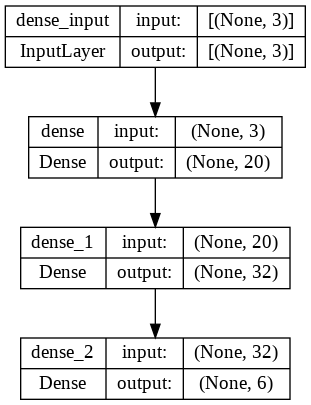

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
base_accuracy

0.2686588168144226

In [ ]:
# Save the model to disk
# base_model.save_weights("model.h5")

# Load the model from disk later using:
# base_model.load_weights("model.h5")

# Evaluate the model
model.evaluate(
    X_test,
    Y_test
)

# Predict on the first 5 tests
predictions = model.predict(X_test[:5])

# Print our model's predictions
print(predictions)

# Check our predictions against the ground truths
print(Y_test[:5])

1/1 [==============================] - 0s 96ms/step
[[111.58665   38.95834    0.         0.         0.         0.      ]
 [ 49.96849   11.110489   0.         0.         0.         0.      ]
 [ 63.157974  10.632084 142.11006    0.         0.         0.      ]
 [ 80.00118   51.342697   0.         0.         0.         0.      ]
 [ 59.08367   84.82073    0.         0.         0.         0.      ]]
               Q0         Q1          Q2          Q3         Q4          Q5
75721  110.735718  -4.359409 -132.095340 -303.634690  23.294755 -184.341445
80184   48.464594  -9.056802 -129.333489   50.395944  47.911461  -65.202715
19864  -95.122414  49.990456  138.991244  -53.574418  85.732990  160.620938
76699   83.758040  56.760535  -61.192589 -344.451730 -65.335157  -56.074314
92991   99.773533  77.945159 -104.791376   48.952619  -6.947942   86.393221


In [ ]:
Y_pred = model.predict(X_test)

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Get training and test accuracy histories
training_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

469/469 [==============================] - 1s 1ms/step


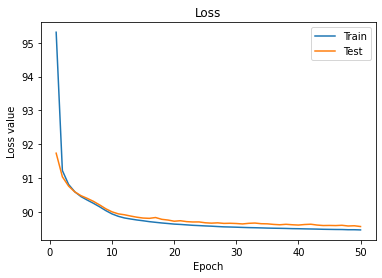

In [ ]:
# Visualize loss history
plt.figure()
plt.title("Loss")
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.legend(["Train", "Test"])
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.show()

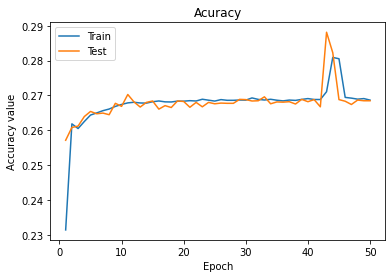

In [ ]:
# Visualize accuracy history
plt.figure()
plt.title("Acuracy")
plt.plot(epoch_count, training_acc)
plt.plot(epoch_count, test_acc)
plt.legend(["Train", "Test"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy value")
plt.show()